#### 1.Import and Install Dependencies

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install gTTs

Defaulting to user installation because normal site-packages is not writeable
  Using cached gTTS-2.5.1-py3-none-any.whl.metadata (4.1 kB)
Using cached gTTS-2.5.1-py3-none-any.whl (29 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
# import time
import mediapipe as mp
from IPython.display import Audio
from gtts import gTTS

#### 2.Keypoints using MP Holistics

In [5]:
mp_holistic = mp.solutions.holistic          
mp_drawing = mp.solutions.drawing_utils       

In [6]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)     
    image.flags.writeable = False                    
    results = model.process(image)                   
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)    
    return image,results

In [7]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks , mp_holistic.FACEMESH_CONTOURS) #draw face connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks , mp_holistic.POSE_CONNECTIONS) #draw pose connection   
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks , mp_holistic.HAND_CONNECTIONS) #draw left_hand connection   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks , mp_holistic.HAND_CONNECTIONS) #draw right_hand connection  

In [8]:
def draw_styled_landmarks(image,results):
    #draw face connection
    mp_drawing.draw_landmarks(image, results.face_landmarks , mp_holistic.FACEMESH_CONTOURS ,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    #draw pose connection
    mp_drawing.draw_landmarks(image, results.pose_landmarks , mp_holistic.POSE_CONNECTIONS ,
                              mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) 
    #draw left_hand connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks , mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,76),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,250),thickness=2,circle_radius=2))  
    #draw right_hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks , mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2))   

In [9]:
cap = cv2.VideoCapture(0)
#Access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        image,results = mediapipe_detection(frame,holistic)
        draw_styled_landmarks(image,results)
        cv2.imshow('OpenCV Feed',image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [10]:
cap.release()
cv2.destroyAllWindows()

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
frame

array([[[205, 205, 199],
        [204, 205, 199],
        [202, 204, 198],
        ...,
        [162, 164, 160],
        [162, 164, 160],
        [163, 165, 161]],

       [[204, 204, 198],
        [204, 205, 199],
        [203, 205, 199],
        ...,
        [161, 164, 160],
        [161, 164, 160],
        [161, 164, 160]],

       [[206, 205, 198],
        [205, 205, 199],
        [204, 205, 199],
        ...,
        [160, 165, 161],
        [160, 165, 161],
        [159, 164, 160]],

       ...,

       [[135, 153, 158],
        [136, 154, 158],
        [136, 154, 158],
        ...,
        [ 60,  59,  73],
        [ 63,  60,  73],
        [ 63,  60,  73]],

       [[136, 153, 156],
        [137, 154, 157],
        [137, 154, 157],
        ...,
        [ 56,  58,  72],
        [ 58,  58,  70],
        [ 61,  60,  73]],

       [[139, 156, 158],
        [139, 156, 158],
        [139, 156, 158],
        ...,
        [ 54,  56,  71],
        [ 57,  58,  70],
        [ 59,  59,  72]]

In [13]:
results

mediapipe.python.solution_base.SolutionOutputs

In [14]:
draw_landmarks(frame,results)

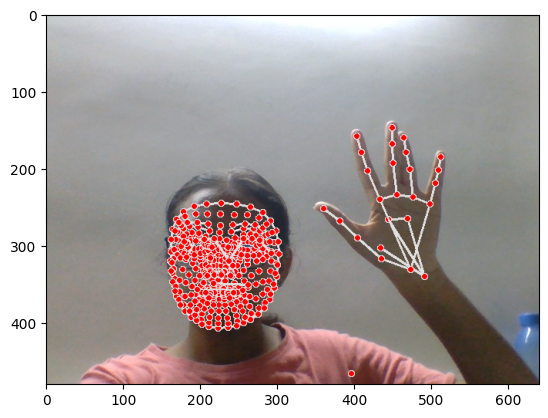

In [15]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [16]:
draw_styled_landmarks(frame,results)

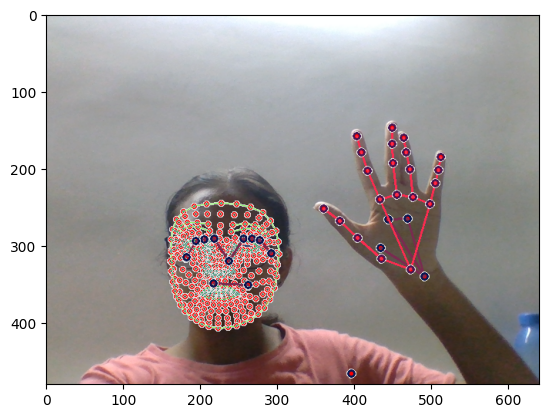

In [17]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

#### 3.Extract Keypoint Values

In [18]:
len(results.pose_landmarks.landmark)

33

In [19]:
def extract_keypoints (results):
    pose=[]
    face=[]
    lh=[]
    rh=[]
    
    #extracting keypoints of pose_landmarks
    if results.pose_landmarks.landmark :
        for res in results.pose_landmarks.landmark:
            test = np.array([res.x,res.y,res.z,res.visibility])
            pose.append(test)
        pose=np.array(pose).flatten()
    else:
        pose=np.zeros(33*4)
    
    #extracting keypoints of face_landmarks
    if results.face_landmarks.landmark :
        for res in results.face_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            face.append(test)
        face = np.array(face).flatten()
    else:
        face=np.zeros(468*3)
    
    #extracting keypoints of left_hand_landmarks
    if results.left_hand_landmarks :
        for res in results.left_hand_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            lh.append(test)
        lh = np.array(lh).flatten()
    else:
        lh=np.zeros(21*3)
    
    #extracting keypoints of right_hand_landmarks
    if results.right_hand_landmarks :
        for res in results.right_hand_landmarks.landmark:
            test = np.array([res.x,res.y,res.z])
            rh.append(test)
        rh = np.array(rh).flatten()
    else:
        rh=np.zeros(21*3)
    
    return np.concatenate([pose,face,lh,rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.37057945,  0.66710836, -0.69304234, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
np.save('0',result_test)

In [23]:
np.load('0.npy')

array([ 0.37057945,  0.66710836, -0.69304234, ...,  0.        ,
        0.        ,  0.        ])

#### 4.Setup Folders for Collection

In [24]:
#path for exported data , numpy arrays
DATA_PATH = os.path.join('FIRST')

#actions that we try to detect
actions = np.array(['hello','thanks','help'])

#thirty videos worth of data
no_sequences = 30

#videos are going to be 25 frames in length
sequence_length = 25


In [25]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action ,str(sequence)))
        except:
            pass

#### 5.Collect Keypoint Values for Training and Testing

In [29]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)


                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
               
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
cap.release()
cv2.destroyAllWindows()

#### 6.Preprocess Data and Create Labels and Features

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'hello': 0, 'thanks': 1, 'help': 2}

In [29]:
sequences,labels = [],[]
for action in actions:
    for sequence in range(no_sequences-5):
        window=[]
        for frame_num in range (sequence_length):
            res=np.load(os.path.join(DATA_PATH, action, str(sequence),'{}.npy'.format(frame_num)))
            window.append(res)
            sequences.append(window)
            labels.append(label_map[action])

In [30]:
np.array(sequences).shape

(1875, 25, 1662)

In [31]:
np.array(labels).shape

(1875,)

In [32]:
x= np.array(sequences)
x.shape

(1875, 25, 1662)

In [33]:
y=to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [36]:
y_test.shape

(94, 3)

#### 7.Build and Train LSTM NeuralNetwork

##### why we use this?
    -less data required
    -faster to train
    -Faster Detections

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [38]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(25,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [40]:
x.shape

(1875, 25, 1662)

In [41]:
res=[0.7,0.2,0.1]
actions[np.argmax(res)]

'hello'

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
56/56 [==============================] - 11s 72ms/step - loss: 6.6417 - categorical_accuracy: 0.3706
Epoch 2/100
56/56 [==============================] - 3s 58ms/step - loss: 4.3228 - categorical_accuracy: 0.4222
Epoch 3/100
56/56 [==============================] - 3s 58ms/step - loss: 0.6971 - categorical_accuracy: 0.7243
Epoch 4/100
56/56 [==============================] - 3s 58ms/step - loss: 0.9639 - categorical_accuracy: 0.7075
Epoch 5/100
56/56 [==============================] - 3s 58ms/step - loss: 2.7643 - categorical_accuracy: 0.5255
Epoch 6/100
56/56 [==============================] - 3s 60ms/step - loss: 0.7042 - categorical_accuracy: 0.7597
Epoch 7/100
56/56 [==============================] - 3s 59ms/step - loss: 1.5182 - categorical_accuracy: 0.5761
Epoch 8/100
56/56 [==============================] - 3s 59ms/step - loss: 0.6269 - categorical_accuracy: 0.7563
Epoch 9/100
56/56 [==============================] - 3s 59ms/step - loss: 0.3680 - categorical_accuracy

KeyboardInterrupt: 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 25, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 25, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

#### 8.Make Predictions

In [45]:
res = model.predict(X_test)

3/3 [==============================] - 1s 37ms/step


In [46]:
actions[np.argmax(res[0])]

'thanks'

In [47]:
actions[np.argmax(y_test[0])]

'thanks'

#### 9.Save Weights

In [48]:
model.save('action.h5')

C:\Users\Asus\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
# del model
# model.load_weights('action.h5')

#### 10.Evaluation using Confusion Matrix and Accuracy

In [49]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [50]:
yhat = model.predict(X_test)

3/3 [==============================] - 0s 37ms/step


In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[59,  1],
        [ 0, 34]],

       [[64,  0],
        [ 1, 29]],

       [[64,  0],
        [ 0, 30]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

0.9893617021276596

#### 11.Real Time Testing

In [60]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

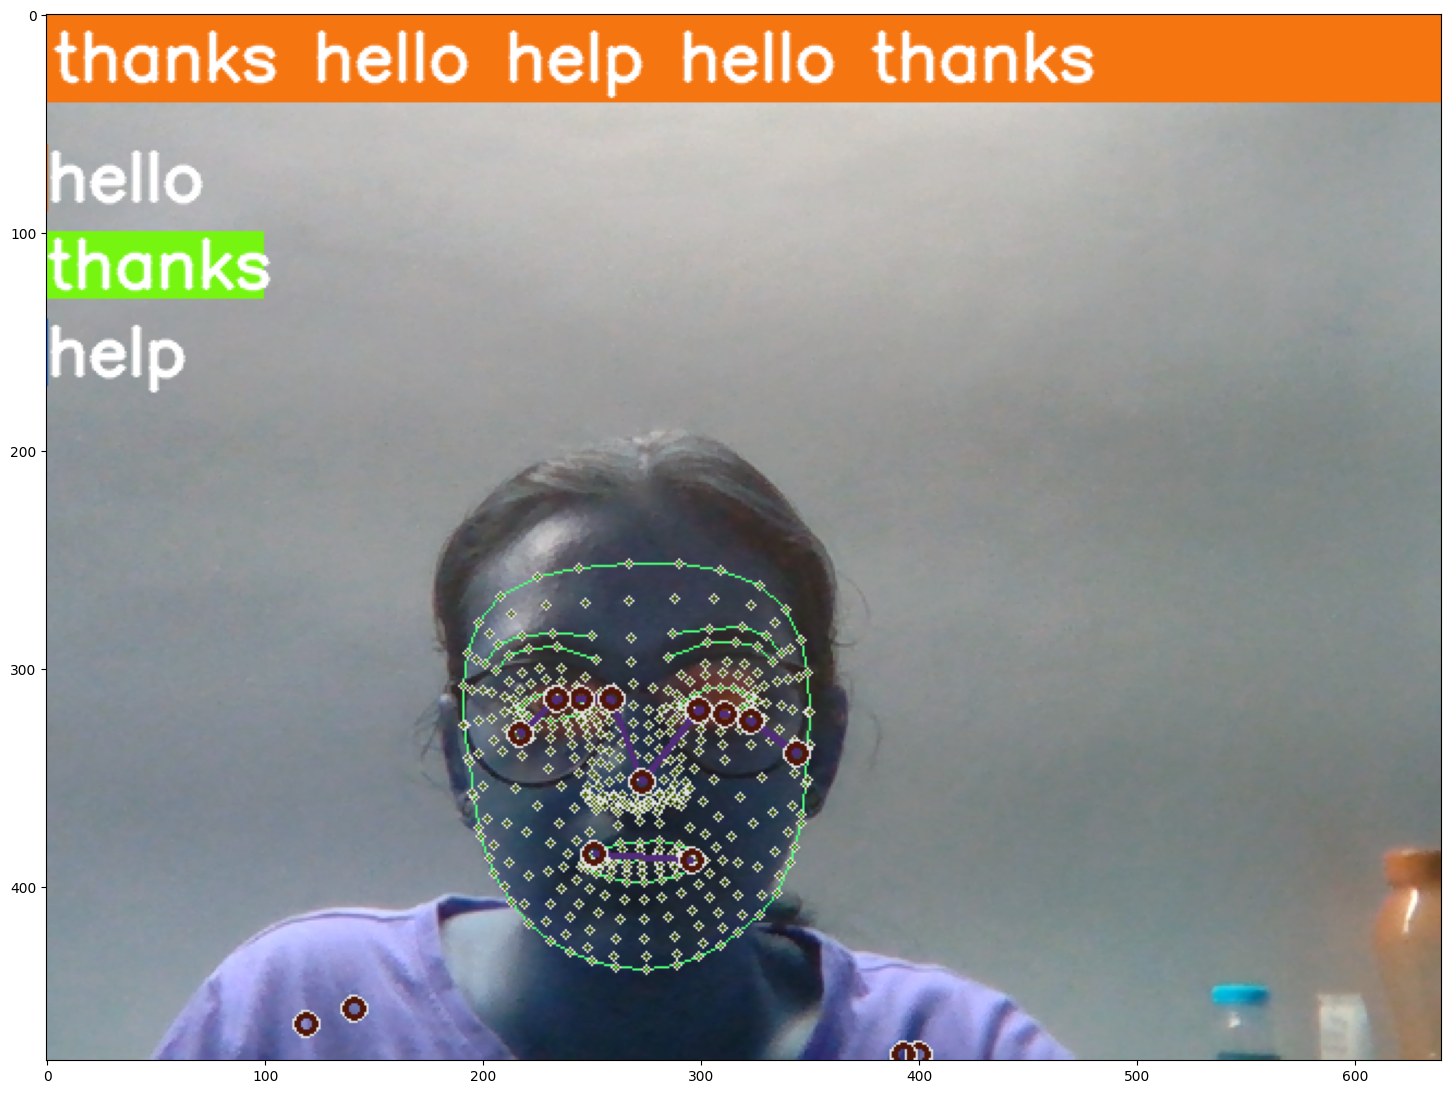

In [63]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res,actions,image,colors))

In [65]:
sequence=[]
sentence=[]
threshold=0.8

cap = cv2.VideoCapture(0)
#Access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        #make detections
        image,results = mediapipe_detection(frame,holistic)
#         print(results)
    
        #Draw land_marks
        draw_styled_landmarks(image,results)
        
          # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-25:]
        
        if len(sequence) == 25:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax (res)])
            
 
             #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                        mytext = actions[np.argmax(res)]
                        language = 'en'

                        myobj = gTTS(text=mytext, lang=language, slow=False)
                        myobj.save("welcome.mp3")
                        os.system("mpg321 welcome.mp3")
                        file_path = 'welcome.mp3'
                        audio = Audio(file_path,autoplay=True)
                        display(audio) 
                else:
                    sentence.append(actions[np.argmax(res)])
                

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        #show to screen
        cv2.imshow('OpenCV Feed',image)

        #breaking loop
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    
    
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 394ms/step
thanks
1/1 [==============================] - 0s 71ms/step
thanks
1/1 [==============================] - 0s 78ms/step
thanks
1/1 [==============================] - 0s 56ms/step
thanks
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 73ms/step
hello


1/1 [==============================] - 0s 57ms/step
hello
1/1 [==============================] - 0s 71ms/step
hello
1/1 [==============================] - 0s 60ms/step
hello
1/1 [==============================] - 0s 72ms/step
hello
1/1 [==============================] - 0s 64ms/step
hello
1/1 [==============================] - 0s 61ms/step
hello
1/1 [==============================] - 0s 74ms/step
hello
1/1 [==============================] - 0s 86ms/step
hello
1/1 [==============================] - 0s 57ms/step
hello
1/1 [==============================] - 0s 60ms/step
hello
1/1 [==============================] - 0s 63ms/step
hello
1/1 [==============================] - 0s 58ms/step
hello
1/1 [==============================] - 0s 61ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 60ms/step
hello
1/1 [==============================] - 0s 58ms/step
help
1/1 [==========

1/1 [==============================] - 0s 51ms/step
help
1/1 [==============================] - 0s 56ms/step
help
1/1 [==============================] - 0s 59ms/step
help
1/1 [==============================] - 0s 59ms/step
help
1/1 [==============================] - 0s 56ms/step
thanks
1/1 [==============================] - 0s 63ms/step
thanks


1/1 [==============================] - 0s 57ms/step
thanks
1/1 [==============================] - 0s 58ms/step
thanks
1/1 [==============================] - 0s 60ms/step
thanks
1/1 [==============================] - 0s 69ms/step
thanks
1/1 [==============================] - 0s 54ms/step
thanks
1/1 [==============================] - 0s 64ms/step
thanks
1/1 [==============================] - 0s 52ms/step
thanks
1/1 [==============================] - 0s 62ms/step
thanks
1/1 [==============================] - 0s 63ms/step
thanks
1/1 [==============================] - 0s 60ms/step
thanks
1/1 [==============================] - 0s 55ms/step
thanks
1/1 [==============================] - 0s 60ms/step
thanks
1/1 [==============================] - 0s 55ms/step
help


1/1 [==============================] - 0s 57ms/step
help
1/1 [==============================] - 0s 55ms/step
help
1/1 [==============================] - 0s 67ms/step
help
1/1 [==============================] - 0s 54ms/step
thanks


1/1 [==============================] - 0s 57ms/step
thanks
1/1 [==============================] - 0s 55ms/step
thanks
1/1 [==============================] - 0s 57ms/step
thanks
1/1 [==============================] - 0s 56ms/step
thanks
1/1 [==============================] - 0s 59ms/step
thanks
1/1 [==============================] - 0s 55ms/step
thanks
1/1 [==============================] - 0s 53ms/step
thanks
1/1 [==============================] - 0s 57ms/step
help


1/1 [==============================] - 0s 56ms/step
help
1/1 [==============================] - 0s 57ms/step
help
1/1 [==============================] - 0s 53ms/step
help
1/1 [==============================] - 0s 52ms/step
help
1/1 [==============================] - 0s 55ms/step
help
1/1 [==============================] - 0s 64ms/step
help
1/1 [==============================] - 0s 61ms/step
help
1/1 [==============================] - 0s 57ms/step
help
1/1 [==============================] - 0s 58ms/step
help
1/1 [==============================] - 0s 53ms/step
help
1/1 [==============================] - 0s 55ms/step
help
1/1 [==============================] - 0s 57ms/step
help
1/1 [==============================] - 0s 59ms/step
help
1/1 [==============================] - 0s 54ms/step
help
1/1 [==============================] - 0s 63ms/step
help
1/1 [==============================] - 0s 55ms/step
help
1/1 [==============================] - 0s 53ms/step
help
1/1 [==========================

1/1 [==============================] - 0s 49ms/step
hello
1/1 [==============================] - 0s 57ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 66ms/step
hello
1/1 [==============================] - 0s 53ms/step
hello
1/1 [==============================] - 0s 55ms/step
hello
1/1 [==============================] - 0s 57ms/step
hello
1/1 [==============================] - 0s 66ms/step
hello
1/1 [==============================] - 0s 56ms/step
hello
1/1 [==============================] - 0s 54ms/step
hello
1/1 [==============================] - 0s 58ms/step
hello


In [62]:
cap.release()
cv2.destroyAllWindows()